# **Level 1 : Task 1**
Task: Top Cuisines

1.Determine the top three most
common cuisines in the dataset.

2.Calculate the percentage of
restaurants that serve each of the top
cuisines.

In [1]:
import pandas as pd

In [2]:
og_data=pd .read_csv("/content/Dataset .csv")
data=og_data.copy()
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
d=data["Cuisines"].fillna("None",inplace=True)
data[data["Cuisines"]=="None"]
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

1.Determine the top three most
common cuisines in the dataset.

In [6]:
cuisines_list = data['Cuisines'].str.split(', ').explode()

top_cuisines = cuisines_list.value_counts().head(3)

print(top_cuisines)

North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64


2.Calculate the percentage of restaurants that serve each of the top cuisines.

In [7]:
top_Cuisines_data= data[data['Cuisines'].str.contains('North Indian') &
                     data['Cuisines'].str.contains('Chinese') &
                     data['Cuisines'].str.contains('Fast Food')]

top_Cuisines_data['Restaurant Name']
top=len(top_Cuisines_data)
total=len(data)
print(top)
print(total)
percentage=round((top/total)*100,3)
str(percentage)+"%"

236
9551


'2.471%'

# **Level 1 : Task 2**
Task: City Analysis



1.Identify the city with the highest number of restaurants in the dataset.

In [8]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
data["City"].value_counts().idxmax()

'New Delhi'

2.Calculate the average rating for restaurants in each city.

In [10]:
rest_city=data.groupby("City")
s=rest_city['Aggregate rating'].mean()
s



City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

3.Determine the city with the highest average rating.

In [11]:
s=rest_city['Aggregate rating'].mean()
high_rating=s.sort_values(ascending=False)
high_rating.head(5)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64

In [23]:
high_avg_city=rest_city['Aggregate rating'].mean().idxmax()
high_avg_city

'Inner City'

# **Level 1 : Task 3**
Task: Price Range Distribution



Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [13]:
import matplotlib.pyplot as plt


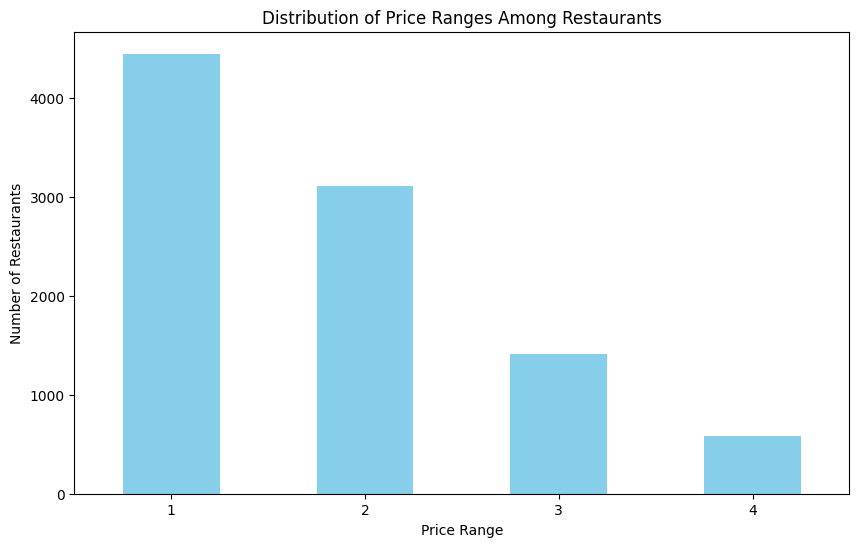

In [14]:


plt.figure(figsize=(10, 6))
data['Price range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

This graph right-skewed distribution which suggest that most restaurants have lower prices, but there are a few high-end restaurants with significantly higher prices.

Calculate the percentage of restaurants in each price range category.

In [15]:
q=data["Price range"].value_counts()
q

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [16]:

for w ,b in q.items():
  p=round((b/9551)*100,3)
  print(f"Price Range: {w}, Percentage: {p}%")
print("total restaurants: ",len(data))



Price Range: 1, Percentage: 46.529%
Price Range: 2, Percentage: 32.593%
Price Range: 3, Percentage: 14.742%
Price Range: 4, Percentage: 6.135%
total restaurants:  9551


# **Level 1 : Task 4**
Task: Online Delivery




Determine the percentage of restaurants
that offer online delivery.


In [17]:
data["Has Online delivery"].unique()
l=data[data["Has Online delivery"]=='Yes']
online_delivery=len(l)
total=len(data)
perc_online_delivery=round((online_delivery/total)*100,3)
str(perc_online_delivery)+"%"



'25.662%'

Compare the average ratings of restaurants
with and without online delivery.


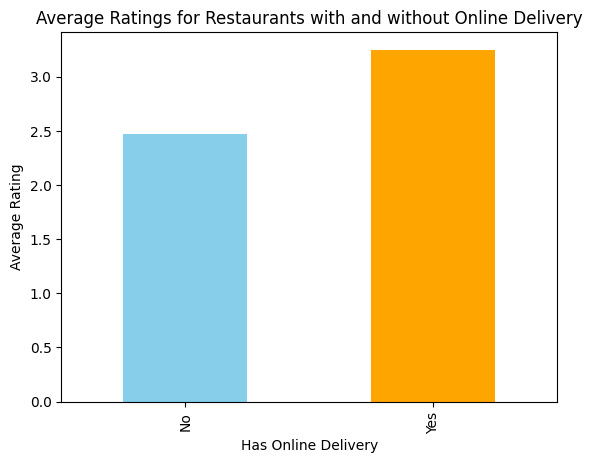

In [18]:


data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': True, 'No': False})


average_ratings_by_delivery = data.groupby('Has Online delivery')['Aggregate rating'].mean()


average_ratings_by_delivery.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Ratings for Restaurants with and without Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Rating')
plt.xticks([False, True], ['No', 'Yes'])
plt.show()

END